<a href="https://colab.research.google.com/github/GDharan10/Project11_Classification/blob/main/Project11_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installation**

In [4]:
pip install lazypredict

In [5]:
pip install --upgrade lazypredict


In [6]:
pip install scikit-learn==1.0.2


# **Libraries**

In [7]:
import pandas as pd

# Visualization / EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding categorical variables and scaling numerical features.
from sklearn.preprocessing import OrdinalEncoder

# Split data for training and testing & Optimizing model parameters
from sklearn.model_selection import train_test_split

In [8]:
# Machine Learning : Identifying algorithms/Model
from lazypredict.Supervised import LazyClassifier

In [49]:
# Machine Learning : Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc,\
     roc_auc_score, confusion_matrix,ConfusionMatrixDisplay, classification_report, roc_curve

# **Data collection**

In [9]:
df = pd.read_csv("/content/drive/MyDrive/DTM15/Dataset/classification_data.csv")

# **Data observation**

In [10]:
df.head()

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.35,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
1,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.35,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
2,28,1816,Paid Search,0,GoogleAnalytics,Android,True,mobile,Ajman,25.41,...,(automatic matching),True,True,3843,0,77417,1477195214,"(not set)////baby_products--milk,_food_&_juice...",1,2021-01-01
3,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.45,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
4,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.45,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  object 
 3   totals_newVisits        100000 non-null  int64  
 4   device_browser          100000 non-null  object 
 5   device_operatingSystem  100000 non-null  object 
 6   device_isMobile         100000 non-null  bool   
 7   device_deviceCategory   100000 non-null  object 
 8   geoNetwork_region       100000 non-null  object 
 9   geoNetwork_latitude     100000 non-null  float64
 10  geoNetwork_longitude    100000 non-null  float64
 11  historic_session        100000 non-null  int64  
 12  historic_session_page   100000 non-null  int64  
 13  youtube                 100000 non-null  int64  
 14  avg_session_time     

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
count_session,100000.00,21.53,24.00,1.00,6.00,15.00,29.00,270.00
count_hit,100000.00,3671.72,4627.34,2.00,971.00,2209.00,4812.00,48744.00
totals_newVisits,100000.00,0.02,0.14,0.00,0.00,0.00,0.00,1.00
geoNetwork_latitude,100000.00,24.92,3.35,-33.92,24.45,25.20,25.20,59.33
geoNetwork_longitude,100000.00,54.27,7.91,-87.63,54.38,55.27,55.27,140.32
historic_session,100000.00,9692.26,12891.63,2.00,2694.00,5864.00,11858.00,181715.00
historic_session_page,100000.00,1875.33,5222.53,0.00,0.00,0.00,1985.00,99896.00
youtube,100000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
avg_session_time,100000.00,617.05,670.49,2.00,264.10,396.55,686.88,5441.00
avg_session_time_page,100000.00,237.70,642.88,0.00,0.00,0.00,134.44,5441.00


In [13]:
string_columns = df.select_dtypes(exclude=['int64',"float64"]).columns

In [14]:
df[string_columns].describe().T

,count,unique,top,freq
channelGrouping,100000,3,Paid Search,87948
device_browser,100000,9,GoogleAnalytics,91254
device_operatingSystem,100000,7,iOS,60285
device_isMobile,100000,2,True,93586
device_deviceCategory,100000,3,mobile,93245
geoNetwork_region,100000,91,Dubai,51481
earliest_source,100000,36,google,72665
latest_source,100000,7,google,91489
earliest_medium,100000,18,cpc,77444
latest_medium,100000,2,cpc,99998


In [15]:
df.shape

(100000, 46)

In [16]:
df.duplicated().sum()

90793

In [17]:
df1 = df.drop_duplicates()

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   int64  
 1   count_hit               9207 non-null   int64  
 2   channelGrouping         9207 non-null   object 
 3   totals_newVisits        9207 non-null   int64  
 4   device_browser          9207 non-null   object 
 5   device_operatingSystem  9207 non-null   object 
 6   device_isMobile         9207 non-null   bool   
 7   device_deviceCategory   9207 non-null   object 
 8   geoNetwork_region       9207 non-null   object 
 9   geoNetwork_latitude     9207 non-null   float64
 10  geoNetwork_longitude    9207 non-null   float64
 11  historic_session        9207 non-null   int64  
 12  historic_session_page   9207 non-null   int64  
 13  youtube                 9207 non-null   int64  
 14  avg_session_time        9207 non-null   floa

In [19]:
for column in df.columns:
  print(column,'---',df[column].unique())
  print('---------------------------')

count_session --- [  9  28   2   3   5  77  26  15  25  27  14   8   4  16  17  47   1  11
  10  37  49  40  18  51  22  13  38  20  23  34  19  67  48  35   7   6
  78  52  29  43  45  24  12  41  60  33  68  65  21 135 196  32  42  79
  31 105  36  30  44  90  88  50 106  54  94  39 142  73  59 136  96  85
 128 145 131 124  57 108  61 171  63  56  64  46  86 195  53  62 111  66
  55  76  71 119  72  74  58  69  70  91  98 143 187  95  75 118 132 120
  89 102  80 214 158 117 100 104  84 121 193  92 159 101  87 147  97 126
 141 107 127 177 110  81 114 221 133  93 138 203 116 125 134 152 112  82
 103 178  83 180 122 163 123 270 149  99 242 191 174]
---------------------------
count_hit --- [ 1194  1816   299 ...  7439  1148 12340]
---------------------------
channelGrouping --- ['(Other)' 'Paid Search' 'Display']
---------------------------
totals_newVisits --- [0 1]
---------------------------
device_browser --- ['GoogleAnalytics' 'Safari' 'Chrome' 'Edge' 'Firefox' 'Samsung Internet'
 

# **EDA**

## **1. Distribution of Target Variable (has_converted)**

Plot the distribution of the has_converted variable to see the balance between converted and non-converted users.

Use a bar plot or pie chart to visualize this.


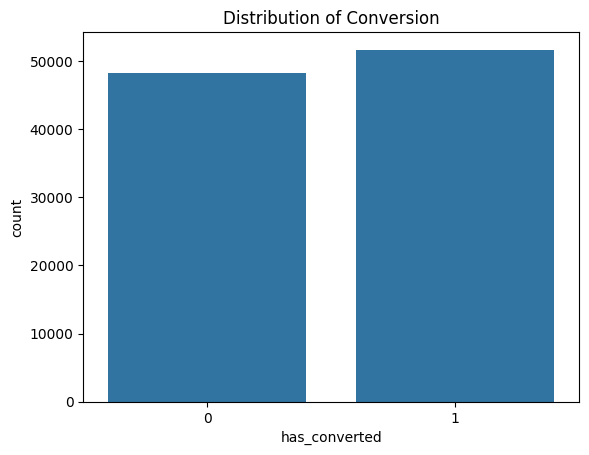

In [20]:
sns.countplot(x='has_converted', data=df)
plt.title('Distribution of Conversion')
plt.show()

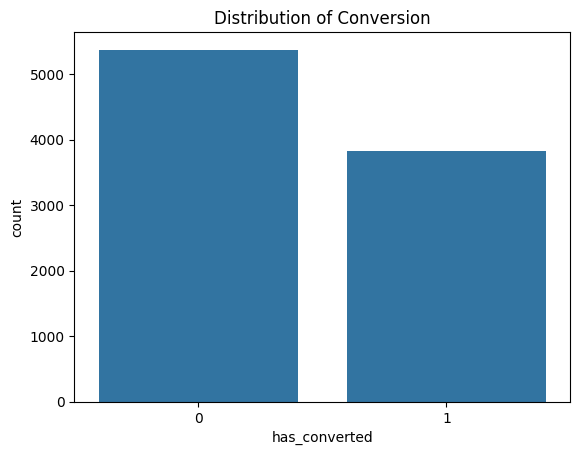

In [21]:
sns.countplot(x='has_converted', data=df1)
plt.title('Distribution of Conversion')
plt.show()

## **2. Session and Hit Insights**

Visualize the distribution of count_session and count_hit to understand the general engagement metrics.

Plot histograms for these features to check their distributions.

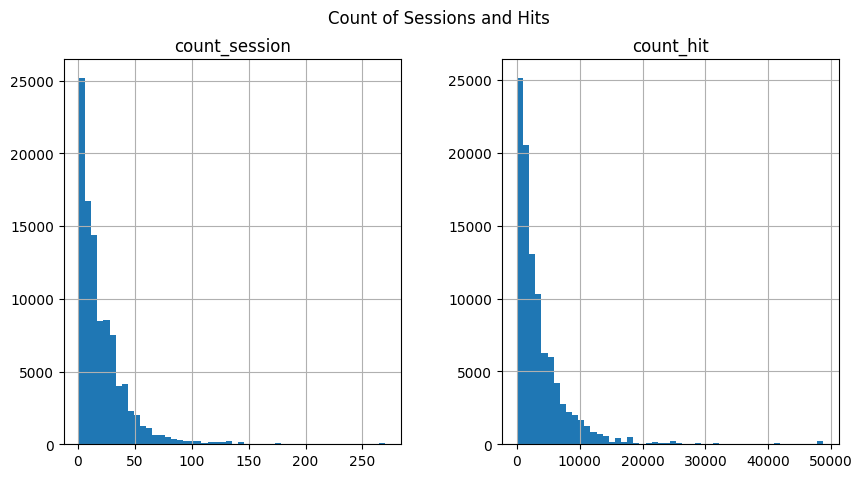

In [22]:
df[['count_session', 'count_hit']].hist(bins=50, figsize=(10, 5))
plt.suptitle('Count of Sessions and Hits')
plt.show()

## **3. Geographical Analysis (geoNetwork)**

Use a bar plot for geoNetwork_region to see which regions are bringing the most traffic.

If there are specific locations that show high conversions, that could be useful insight.

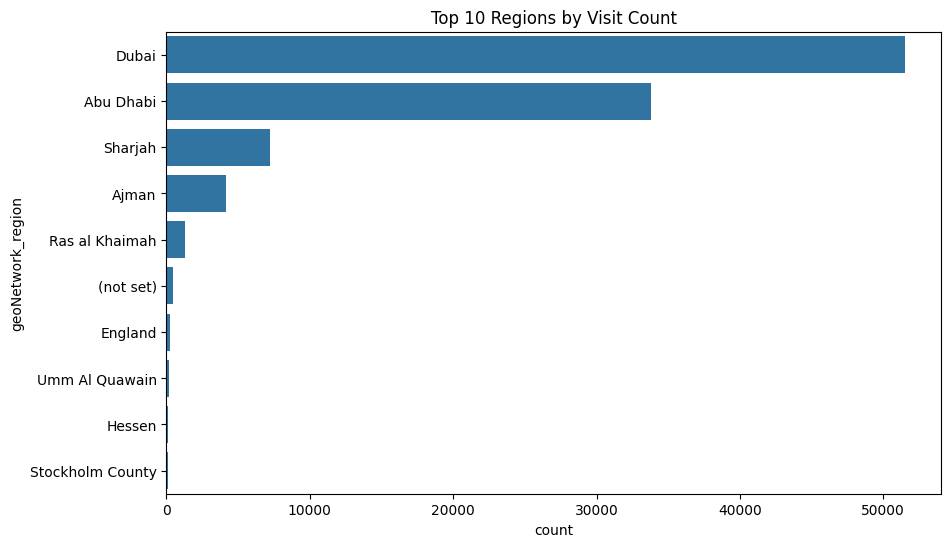

In [23]:
plt.figure(figsize=(10, 6))

# Get the top 10 regions based on visit count
top_10_regions = df['geoNetwork_region'].value_counts().nlargest(10).index

# Plot the countplot for the top 10 regions
sns.countplot(y='geoNetwork_region', data=df, order=top_10_regions)
plt.title('Top 10 Regions by Visit Count')
plt.show()

## **4. Device Information**

Plot the distribution of device_isMobile, device_browser, and device_operatingSystem.

Understanding if mobile or desktop users are more likely to convert can give actionable insights.

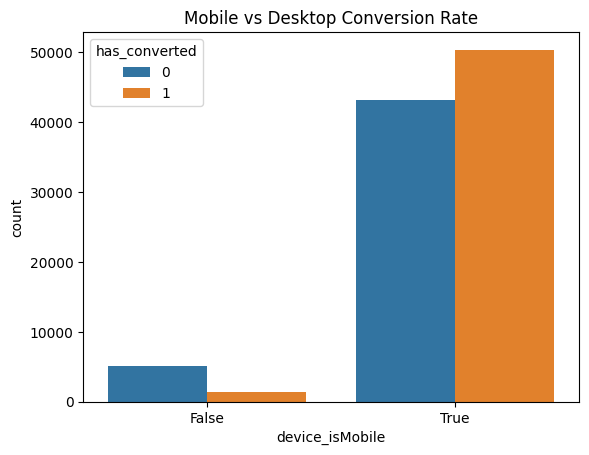

In [24]:
sns.countplot(x='device_isMobile', hue='has_converted', data=df)
plt.title('Mobile vs Desktop Conversion Rate')
plt.show()

## **5. Time Spent on Site**

Analyze the avg_session_time and avg_visit_time. Higher session times could indicate higher engagement and potential conversion.

Use a box plot to visualize these variables and compare them with conversion status.

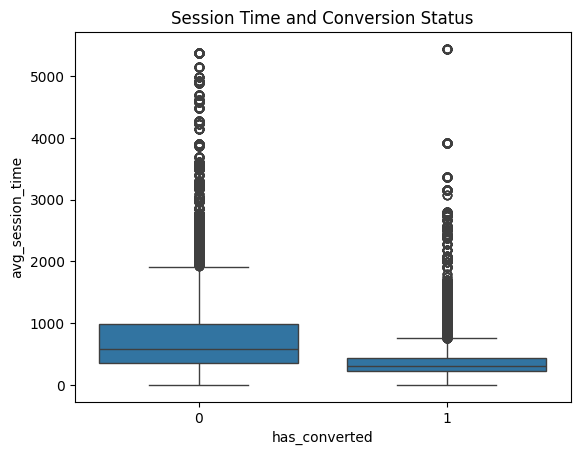

In [25]:
sns.boxplot(x='has_converted', y='avg_session_time', data=df)
plt.title('Session Time and Conversion Status')
plt.show()

## **6. Source of Traffic (latest_source, earliest_source)**

Investigate if certain traffic sources (like Google, direct, etc.) are more likely to convert.

Use a bar plot for this.

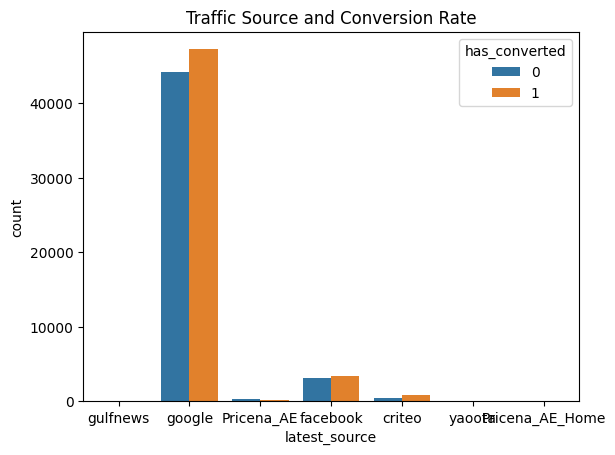

In [26]:
sns.countplot(x='latest_source', hue='has_converted', data=df)
plt.title('Traffic Source and Conversion Rate')
plt.show()

## **7. Correlation Matrix**
Create a correlation heatmap to identify any strong relationships between features and the target variable.

In [27]:
# corr_matrix = df.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix')
# plt.show()

# **Data Preprocessing**

## **Data Cleaning**

In [28]:
# Constant value columns
df.drop([ "youtube" , "target_date" , "days_since_last_visit" ], axis = 1, inplace = True)

In [29]:
# Have geoNetwork_region
df.drop([ "geoNetwork_latitude" , "geoNetwork_longitude" ], axis = 1, inplace = True)

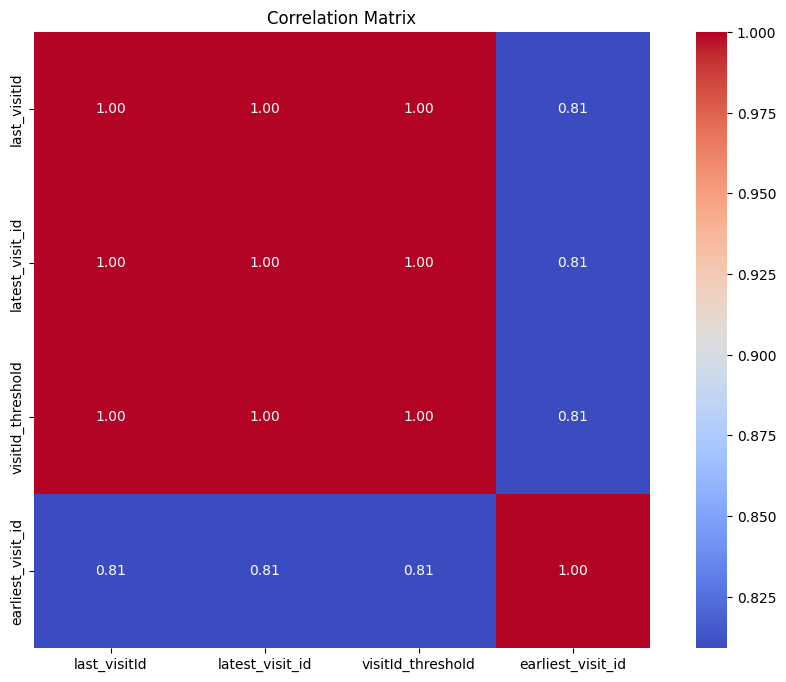

In [30]:
visitId_columns = ['last_visitId', 'latest_visit_id', 'visitId_threshold', 'earliest_visit_id']
visitId_corr_matrix = df[visitId_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(visitId_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

In [31]:
# Highly correlated columns
df.drop([ 'latest_visit_id', 'visitId_threshold' ], axis = 1, inplace = True)

## **NLP**

In [32]:
# Text data need to do NLP
df.drop([ 'earliest_keyword' , 'latest_keyword' , 'products_array'], axis = 1, inplace = True)

## **Feature Selection**

In [33]:
# Univariate Feature Selection: Use statistical tests to select features.

from sklearn.feature_selection import SelectKBest, chi2

X_numeric = df.select_dtypes(include=['int64', 'float64'])  # Select numerical columns
y = df['has_converted']

# Select top k features
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X_numeric, y)
selected_features = X_numeric.columns[selector.get_support()].tolist()
print(selected_features)


['count_hit', 'historic_session', 'historic_session_page', 'avg_session_time', 'avg_session_time_page', 'earliest_visit_id', 'latest_visit_number', 'num_interactions', 'time_on_site', 'transactionRevenue']


## **Encoding**

In [34]:
string_columns_1 = df.select_dtypes(exclude=['int64',"float64"]).columns
encode=OrdinalEncoder()

for column in string_columns_1:
  encode.fit(df[[column]])
  df[column] = encode.transform(df[[column]])

# **Machine Learning**

In [35]:
# separating independent and dependent
x=df.drop("has_converted",axis=1)
y=df["has_converted"]

In [36]:
# Splitting the data for training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)

## **Model / Identifying algorithms:**

In [37]:
# Randomly sample 10% of the data
sampled_data = df.sample(frac=0.1, random_state=42)

# Extract features (X) and target variable (Y)
X=sampled_data.drop("has_converted",axis=1)
Y=sampled_data["has_converted"]

# Split the sampled data into training and testing sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25, random_state=42)

In [38]:
# Classification
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)
print(models)

 97%|█████████▋| 28/29 [00:43<00:00,  1.26it/s]

[LightGBM] [Info] Number of positive: 3858, number of negative: 3642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4317
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514400 -> initscore=0.057616
[LightGBM] [Info] Start training from score 0.057616


100%|██████████| 29/29 [00:43<00:00,  1.50s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.99               0.99     0.99      0.99   
XGBClassifier                      0.99               0.99     0.99      0.99   
RandomForestClassifier             0.99               0.99     0.99      0.99   
BaggingClassifier                  0.98               0.98     0.98      0.98   
DecisionTreeClassifier             0.98               0.98     0.98      0.98   
ExtraTreesClassifier               0.97               0.97     0.97      0.97   
AdaBoostClassifier                 0.96               0.96     0.96      0.96   
ExtraTreeClassifier                0.94               0.94     0.94      0.94   
LabelPropagation                   0.94               0.94     0.94      0.94   
LabelSpreading                     0.94               0.94     0.94      0.94   
KNeighborsClassifier        

## **Learning / Training**

In [59]:
from lightgbm import LGBMClassifier
LGB_model=LGBMClassifier().fit(x_train,y_train)
y_pred_train = LGB_model.predict(x_train)
y_pred_test = LGB_model.predict(x_test)

accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

print("LGBMClassifier")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train), "\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision Score:", precision_score(y_test, y_pred_test, average='macro'))
print("Recall Score:", recall_score(y_test, y_pred_test, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_test, average='macro'))

[LightGBM] [Info] Number of positive: 38863, number of negative: 36137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4492
[LightGBM] [Info] Number of data points in the train set: 75000, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.518173 -> initscore=0.072725
[LightGBM] [Info] Start training from score 0.072725
LGBMClassifier
Train Accuracy: 0.99844 
Test Accuracy: 0.99584
Precision Score: 0.9958632296817258
Recall Score: 0.9958108220843704
F1 Score: 0.9958362526273645


In [54]:
import xgboost as xgb
XGB_model = xgb.XGBClassifier().fit(x_train,y_train)
y_pred_train = XGB_model.predict(x_train)
y_pred_test = XGB_model.predict(x_test)

print("xgboost")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train), "\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision Score:", precision_score(y_test, y_pred_test, average='macro'))
print("Recall Score:", recall_score(y_test, y_pred_test, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_test, average='macro'))

xgboost
Accuracy: 0.99732
Precision Score: 0.9973188819715242
Recall Score: 0.9973165597113313
F1 Score: 0.9973177192416505


In [55]:
from sklearn.ensemble import RandomForestClassifier
RFC_model=RandomForestClassifier().fit(x_train,y_train)
y_pred_train = RFC_model.predict(x_train)
y_pred_test = RFC_model.predict(x_test)

print("RandomForestClassifierr")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train), "\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision Score:", precision_score(y_test, y_pred_test, average='macro'))
print("Recall Score:", recall_score(y_test, y_pred_test, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_test, average='macro'))

RandomForestClassifierr
Accuracy: 0.99736
Precision Score: 0.997357759447653
Recall Score: 0.997357759447653
F1 Score: 0.997357759447653


## **Evaluation**

In [52]:
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision Score:", precision_score(y_test, y_pred_test, average='macro'))
print("Recall Score:", recall_score(y_test, y_pred_test, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_test, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Accuracy: 0.99732
Precision Score: 0.9973188819715242
Recall Score: 0.9973165597113313
F1 Score: 0.9973177192416505
Confusion Matrix:
 [[12102    34]
 [   33 12831]]
